In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data containing features
df_features = pd.read_csv(r"C:\Users\jvrdo\Downloads\training_set_features.csv")

# First look into feature dataframe
df_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [2]:
# Loading data containing target variables
df_target = pd.read_csv(r"C:\Users\jvrdo\Downloads\training_set_labels.csv")

# First look into target variables
df_target.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


# Exploratory data analysis and data cleaning


In [3]:
# Joining feature and target dataframe
df = pd.merge(df_features, df_target, how="inner")

# Checking the result
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [4]:
# Checking column types
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [5]:
# Checking for missing values (NaNs)
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [6]:
# Creating the correlation matrix
df.corr()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280,-0.004652
h1n1_concern,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929,0.154828
h1n1_knowledge,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951,0.120152
behavioral_antiviral_meds,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608,0.006277
behavioral_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690,0.076395
behavioral_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498,0.050083
behavioral_wash_hands,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712,0.112414
behavioral_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822,0.064025
behavioral_outside_home,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768,0.053509
behavioral_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648,0.120228


In [7]:
# Basic descriptive statistics (just to check if some max values in our ordinal scales are off)
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

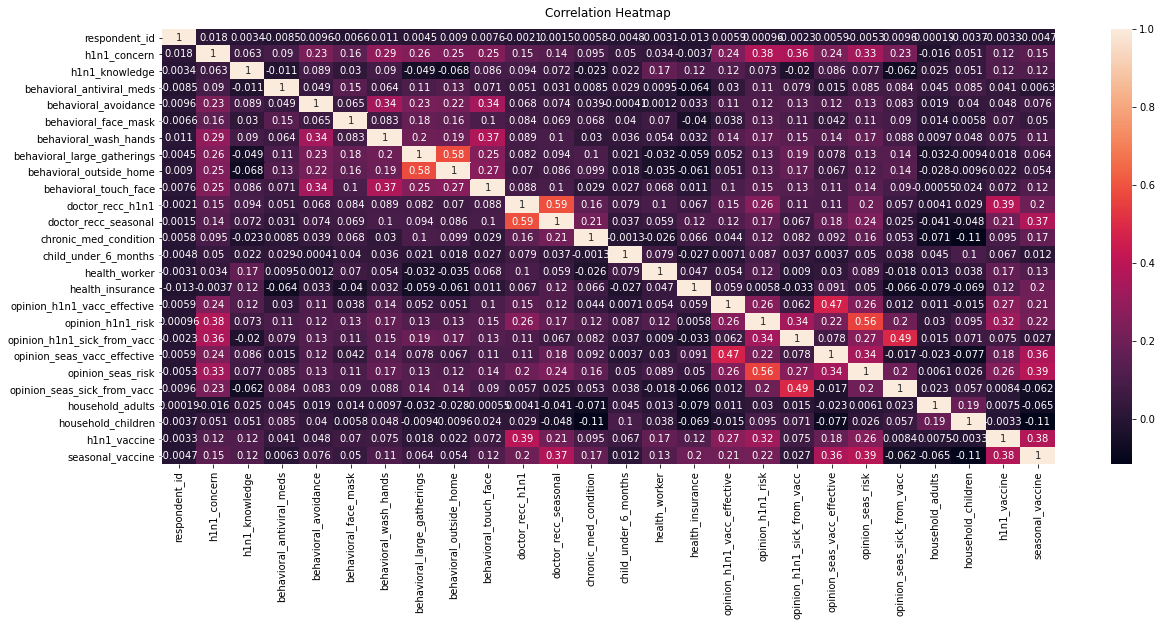

In [8]:
# Creating a correlation heatmap
# Increasing the heatmap size
plt.figure(figsize=(20, 8))

# Generating the heatmap
heatmap = sns.heatmap(df.corr(),annot=True)

# Setting the title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [9]:
# From the heatmap, we can see that h1n1 vaccine and the seasonal vaccine have a weak positive correlation of 0.38, 
# which suggests some dependancy between target variables

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

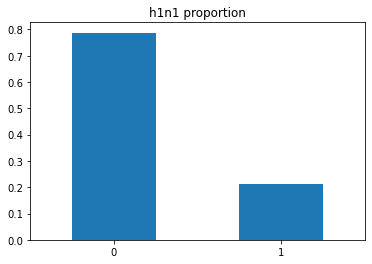

In [10]:
# Plotting the proportion of people taking h1n1 vaccine
n_obs = df.shape[0]

h1n1_prop = df["h1n1_vaccine"].value_counts().div(n_obs).plot(kind="bar")
h1n1_prop.set_title("h1n1 proportion")
plt.xticks(rotation = 0)


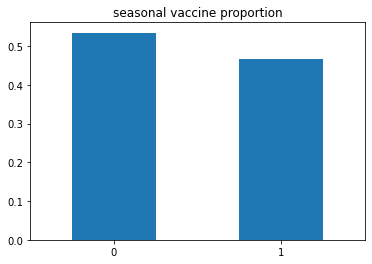

In [11]:
# Plotting the proportion of people taking the seasonal vaccine
seas_prop = df["seasonal_vaccine"].value_counts().div(n_obs).plot(kind="bar")
seas_prop.set_title("seasonal vaccine proportion")
plt.xticks(rotation = 0)
plt.show()

In [12]:
# From the two graphs above, we can discern how the seasonal flu vaccine has balanced classes, 
# whereas the H1N1 flu vaccine target has imbalanced classes.

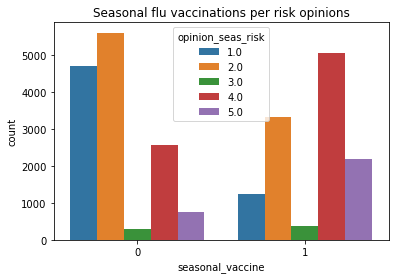

In [13]:
# From the heatmap, we saw a 0.39 correlation between seasonal flu shot and the opinion about seasonal flu risk.
# We will further explore this relationship with a barplot
x= df["seasonal_vaccine"]
h = df["opinion_seas_risk"]
seas_risk = sns.countplot(x=x, data= df, hue=h)
seas_risk.set_title("Seasonal flu vaccinations per risk opinions")
plt.show()

In [14]:
# From the figure above, we can see how people who considered to be at a higher risk for getting sick with the flu,
# where logically also more likely to get vaccinated

Text(0.5, 1.0, 'Seasonal flu vaccinations per age group')

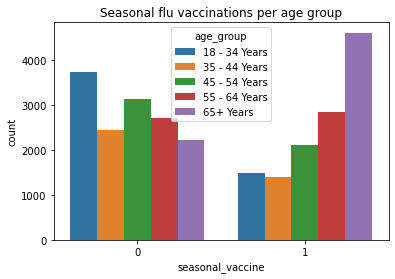

In [15]:
# Next we will check whether there is a relationship between age groups and vaccination rates
age= df["age_group"].sort_values()

flu_age = sns.countplot(x="seasonal_vaccine", data=df, hue=age)
flu_age.set_title("Seasonal flu vaccinations per age group")



Text(0.5, 1.0, 'h1n1 vaccinations per age group')

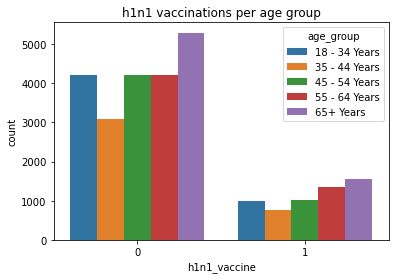

In [16]:
h1n1_age = sns.countplot(x="h1n1_vaccine", data=df, hue=age)
h1n1_age.set_title("h1n1 vaccinations per age group")
# We can see how the age differences are much less pronunced in h1n1 vaccination rates.

Text(0.5, 1.0, 'Different vaccination rates per efficacy opinions')

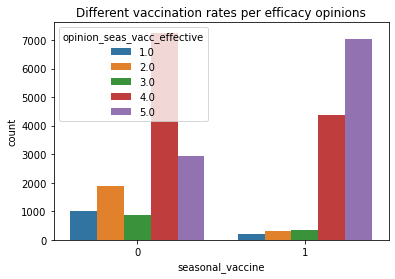

In [17]:
# Further, we will look into the relationship between opinion about vaccine efficacy and seasonal flu vaccination rates
op = df["opinion_seas_vacc_effective"].sort_values()
flu_effect = sns.countplot(x="seasonal_vaccine", data=df, hue=op)
flu_effect.set_title("Different vaccination rates per efficacy opinions")

# Transforming and modelling, creating pipeline

In [18]:
# Checking which features are categorical, and still not coded
print(df.dtypes)

df.columns

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [19]:
# Picking out uncoded categorical variables        
df_categ = ["age_group", "education", "race", "sex", "income_poverty", "marital_status", "rent_or_own", "employment_status", 
               "hhs_geo_region", "census_msa"]

# Picking out columns for imputation with the most frequent values
cols_most_fq = ['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
        'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

# Picking out coluns for imputation with 0
cols_zero = ['health_insurance', 'chronic_med_condition', 'child_under_6_months', 'health_worker']

In [20]:
# Importing modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
# Setting random seed
RANDOM_SEED = 7

# Initiating encoder, imputer, model
ohe = OneHotEncoder(handle_unknown='ignore')
imp_mfq = SimpleImputer(strategy='most_frequent')
con_imp = SimpleImputer(strategy="constant", fill_value="MISSING")
zero_imp = SimpleImputer(strategy='constant', fill_value=0)
clf = OneVsRestClassifier(estimator = LogisticRegression(max_iter=200))

# Creating categorical transformer pipeline
categorical_transformer = Pipeline(
    [
        ('imputer_cat', con_imp),
        ('onehot', ohe)
    ]
)

# Creating first numeric transformer pipeline
numeric_transformer_1 = Pipeline(
    [    
        ('standard_scaler', StandardScaler()),
        ('imputer_fq', imp_mfq)
    ]
)

# Creating second numeric transformer pipeline
numeric_transformer_2 = Pipeline(
    [
        ('imputer_zero', zero_imp)
    ]
)

# Creating column transformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, 
          df_categ),
        ('numerical_1', numeric_transformer_1, cols_most_fq),
        ('numerical_2', numeric_transformer_2, cols_zero)
    ],
    remainder = 'drop'
)

In [21]:
# Initiating full pipeline (transformer + algorithm)
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', clf)
    ]
)

In [22]:
# Train test splitting the data, using the stratify argument to enforce even splits
# (because the target variables were somewhat imbalanced)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
X = df.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1)
y= df[["h1n1_vaccine","seasonal_vaccine"]]
X_train, X_eval, y_train, y_eval = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify= y,
    random_state=RANDOM_SEED
)

In [23]:
# Train model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
     

In [24]:
# Making predictions
preds = pipeline.predict_proba(X_eval)


In [25]:
# Creating a new dataframe with prediction probabilities
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Calculating ROC-AUC score
roc_auc_score(y_eval, y_preds)

In [33]:
# Initiating a second test pipeline (transformer + algorithm)
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression(max_iter=500))

pipeline_2 = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', classifier)
    ]
)

In [ ]:
# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.35,
    shuffle=True,
    stratify= y,
    random_state=RANDOM_SEED
)

In [ ]:
# Fitting the second pipeline
pipeline_2.fit(X_train, y_train)

In [ ]:
# Making predictions
preds_2 = pipeline_2.predict_proba(X_test)


preds_2 = preds_2.toarray()
preds_2

In [ ]:
# Creating a new dataframe with prediction probabilities
y_preds_2 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_2[:,0],
        "seasonal_vaccine": preds_2[:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds_2.shape)
y_preds_2.head()

In [ ]:
roc_auc_score(y_test, preds_2)

In [59]:
# Importing test set
test_features_df = pd.read_csv(r"C:\Users\jvrdo\Downloads\test_set_features.csv")

test_probas = pipeline_2.predict_proba(test_features_df)
test_probas = test_probas.toarray()

test_probas

ValueError: X has 36 features, but ColumnTransformer is expecting 35 features as input.

In [ ]:
# Reading submission format
submission_df_3 = pd.read_csv(r"C:\Users\jvrdo\Downloads\submission_format.csv" 
                           )
submission_df_3 

In [ ]:
# Save predictions to submission data frame
submission_df_3["h1n1_vaccine"] = test_probas[:, 1]
submission_df_3["seasonal_vaccine"] = test_probas[:, 1]

submission_df_3.set_index("respondent_id", inplace=True)

In [ ]:
# Saving my submission as a csv file
submission_df_3.to_csv('my_submission_3.csv')

In [ ]:
submission_df_3

In [31]:
# Tuning the random forrest classifier
# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum nuber of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each lead node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameters grid
param_grid = {"rlf__n_estimators" : n_estimators,
              "rlf__max_features": max_features,
              "rlf__max_depth": max_depth,
              "rlf__min_samples_split": min_samples_split,
              "rlf__min_samples_leaf": min_samples_leaf,
              "rlf__bootstrap":bootstrap}

rlf = RandomForestClassifier(max_depth = 4, max_features = 'sqrt', min_samples_leaf = 2,
                             min_samples_split= 5, n_estimators= 80)

pipeline_3 = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('rlf', rlf)
    ]
)

In [ ]:



rf_Grid = GridSearchCV(estimator = pipeline_3, param_grid = param_grid, cv=3, verbose=2, n_jobs= 4)

rf_Grid.fit(X_train, y_train)

In [ ]:
print(f'Best parameter set: {rf_Grid.best_params_}\n')

In [ ]:
pipeline_3.fit(X_train, y_train)

In [ ]:
# Making predictions
preds_3 = pipeline_3.predict_proba(X_test)


preds_3

In [ ]:
# Creating a new dataframe with prediction probabilities
y_preds_3 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_3[0][:, 1],
        "seasonal_vaccine": preds_3[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds_3.shape)
y_preds_3.head()

In [ ]:
# Calculating ROC-AUC score
roc_auc_score(y_test, y_preds_3)

# Model ensembling


Now we will split the training data into two parts. Then we will 1)train multiple models on Part_1_training_data, 2) make predictions on Part_2_training_data, 3) make predictions on the Test data, 4) train a new model on Part_2 (using prior predictions as features, 5) make new predictions on the test data

In [28]:
# Dropping respondent_id from the original dataframe (df)
df.drop("respondent_id", axis =1, inplace=True)


In [29]:
# Splitting the data into Part 1 and Part 2
new_seed = 77
part_1, part_2 = train_test_split(
    df,
    test_size=0.5,
    shuffle=True,
    stratify= y,
    random_state=new_seed
)

In [34]:
# Creating a pipeline for the ensable
pipeline_ens_1 = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', classifier)
    ]
)

pipeline_ens_2 = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('rlf', rlf)
    ]
)

# Training the first model on Part 1
pipeline_ens_1.fit(part_1.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1), part_1[["h1n1_vaccine","seasonal_vaccine"]])

# Training the second model on Part 1
pipeline_ens_2.fit(part_1.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1), part_1[["h1n1_vaccine","seasonal_vaccine"]])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
     

In [65]:
# Loading test data
test_features_df = pd.read_csv(r"C:\Users\jvrdo\Downloads\test_set_features.csv")
test_features_df.drop("respondent_id", axis=1, inplace=True)
# Make predictions on the Part 2 data
part_2_preds = pipeline_ens_1.predict_proba(part_2.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1))

part_2_preds =part_2_preds.toarray()

# Make predictions on test data
test_clf_preds = pipeline_ens_1.predict_proba(test_features_df)

test_clf_preds = test_clf_preds.toarray()

In [64]:
part_2_preds_rlf = pipeline_ens_2.predict_proba(part_2.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1))

part_2_preds_rlf

# Make predictions with rlf model on test data
test_rlf_preds = pipeline_ens_2.predict_proba(test_features_df)

In [69]:
# Creating a new df with predictions from our models
part_2_preds_df = pd.DataFrame(
    {
        "h1n1_vaccine_clf": part_2_preds[:,0],
        "seasonal_vaccine_clf": part_2_preds[:, 1],
    },
    index = part_2.index
)

part_2_preds_df

# Creating a new df with test predictions
test_preds_df = pd.DataFrame(
    {
        "h1n1_vaccine_clf": test_clf_preds[:,0],
        "seasonal_vaccine_clf": test_clf_preds[:, 1],
    },
    index = test_features_df.index
)

test_preds_df

,h1n1_vaccine_clf,seasonal_vaccine_clf
0,0.175245,0.308484
1,0.022687,0.039461
2,0.327554,0.573923
3,0.579085,0.885784
4,0.322132,0.512581
...,...,...
26703,0.335611,0.478984
26704,0.042248,0.253824
26705,0.199412,0.240935
26706,0.027583,0.301881


In [72]:
part_2_preds_rlf_df = pd.DataFrame(
    {
        "h1n1_vaccine_rlf": part_2_preds_rlf[0][:,1],
        "seasonal_vaccine_rlf": part_2_preds_rlf[1][:, 1],
    },
    index = part_2.index
)

part_2_merged = pd.concat([part_2_preds_rlf_df, part_2_preds_df], axis=1)
part_2_merged

# Creating a df with rlf test predictions
test_rlf_df = pd.DataFrame(
    {
        "h1n1_vaccine_rlf": test_rlf_preds[0][:,1],
        "seasonal_vaccine_rlf": test_rlf_preds[1][:, 1],
    },
    index = test_features_df.index
)

# Merging test predictions
test_merged = pd.concat([test_preds_df, test_rlf_df], axis=1)

test_merged

,h1n1_vaccine_clf,seasonal_vaccine_clf,h1n1_vaccine_rlf,seasonal_vaccine_rlf
0,0.175245,0.308484,0.233500,0.469751
1,0.022687,0.039461,0.083313,0.216029
2,0.327554,0.573923,0.348687,0.638132
3,0.579085,0.885784,0.334544,0.669978
4,0.322132,0.512581,0.248096,0.496230
...,...,...,...,...
26703,0.335611,0.478984,0.219127,0.437321
26704,0.042248,0.253824,0.142566,0.392079
26705,0.199412,0.240935,0.143317,0.336240
26706,0.027583,0.301881,0.119077,0.371079


In [74]:
# Creating a second level model to train or part 2 predictions
sec_lev_model = MultiOutputClassifier(LogisticRegression(max_iter=300))

# Train 2nd level model on part 2 predictions
sec_lev_model.fit(part_2_merged, part_2[["h1n1_vaccine","seasonal_vaccine"]])

# Make stacking predictions on the test data
stack_pred = sec_lev_model.predict_proba(test_merged)

stack_pred

[array([[0.85151102, 0.14848898],
        [0.94871401, 0.05128599],
        [0.6781202 , 0.3218798 ],
        ...,
        [0.89986454, 0.10013546],
        [0.92791272, 0.07208728],
        [0.50674095, 0.49325905]]),
 array([[0.67959284, 0.32040716],
        [0.9298263 , 0.0701737 ],
        [0.32604271, 0.67395729],
        ...,
        [0.83715266, 0.16284734],
        [0.69864414, 0.30135586],
        [0.52852664, 0.47147336]])]

In [79]:
# Creating a new dataframe with stacked predictions
stack_pred_df = pd.DataFrame(
    {
        "h1n1_vaccine_st": test_rlf_preds[0][:,1],
        "seasonal_vaccine_st": test_rlf_preds[1][:, 1],
    },
    index = test_features_df.index
)

stack_pred_df

,h1n1_vaccine_st,seasonal_vaccine_st
0,0.233500,0.469751
1,0.083313,0.216029
2,0.348687,0.638132
3,0.334544,0.669978
4,0.248096,0.496230
...,...,...
26703,0.219127,0.437321
26704,0.142566,0.392079
26705,0.143317,0.336240
26706,0.119077,0.371079


In [82]:
# Reading submission format
submission_df_stack = pd.read_csv(r"C:\Users\jvrdo\Downloads\submission_format.csv" 
                           )

# Save predictions to submission data frame
submission_df_stack["h1n1_vaccine"] = stack_pred_df.iloc[:, 0]
submission_df_stack["seasonal_vaccine"] = stack_pred_df.iloc[:, 1]

submission_df_stack.set_index("respondent_id", inplace=True)

submission_df_stack

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.233500,0.469751
26708,0.083313,0.216029
26709,0.348687,0.638132
26710,0.334544,0.669978
26711,0.248096,0.496230
...,...,...
53410,0.219127,0.437321
53411,0.142566,0.392079
53412,0.143317,0.336240


In [83]:
# Saving my submission as a csv file
submission_df_stack.to_csv('my_submission_stacked.csv')